<a href="https://colab.research.google.com/github/garrisonreid/CHHS-Mini-Projects/blob/master/Food_for_the_Summer_Map_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pandas
!pip install folium
!pip install geopandas

     |████████████████████████████████| 901kB 2.8MB/s 
     |████████████████████████████████| 11.2MB 40.1MB/s 
     |████████████████████████████████| 17.9MB 29.7MB/s 
  Stored in directory: /root/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built munch


In [3]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import folium

df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSoqxUNXIPAXbixYIURlnr_K0_FwJ_z4dUUd_0xHufba-Tnn1ULZa6NtSyNJU4odxKtSKFvmm9qe_Yw/pub?gid=1896976877&single=true&output=csv")
df.head()

,Locations,Address,lat,lng
0,Airport Gardens,"815 Martin Luther King Jr., Blvd, Chapel Hill,...",35.920529,-79.055715
1,Dobbins Hill Apartments,"1749 Dobbins Drive, Chapel Hill, NC 27514",35.946027,-79.015435
2,Eastwood,"100 Louis Armstrong Court, Chapel Hill, NC 27514",35.947130,-79.046989
3,Hargraves Community Center,"216 N Roberson St, Chapel Hill 27516",35.912903,-79.063894
4,S Estes Apartments,"301 S Estes Drive, Chapel Hill, NC 27517",35.924858,-79.024008


In [4]:
def make_point(row):
    return Point(row.lng, row.lat)

def make_marker(row):
  return Markers(row.Locations)
  
# Go through every row, and make a point out of its lat and lon
points = df.apply(make_point, axis=1)
# markers = df.apply(make_marker, axis=1)

# Make a new GeoDataFrame
# using the data from our old df
# but also adding in the geometry we just made
pickupLocations = gpd.GeoDataFrame(df, geometry=points)

# It doesn't come with a CRS because it's a CSV, so let's
# say "hey, let's use the standard shape of the earth etc"
pickupLocations.crs = {'init': 'epsg:4326'}

# Let's look at the first few
pickupLocations.head()


,Locations,Address,lat,lng,geometry
0,Airport Gardens,"815 Martin Luther King Jr., Blvd, Chapel Hill,...",35.920529,-79.055715,POINT (-79.05571500000001 35.92052899999999)
1,Dobbins Hill Apartments,"1749 Dobbins Drive, Chapel Hill, NC 27514",35.946027,-79.015435,POINT (-79.015435 35.946027)
2,Eastwood,"100 Louis Armstrong Court, Chapel Hill, NC 27514",35.947130,-79.046989,POINT (-79.046989 35.94713)
3,Hargraves Community Center,"216 N Roberson St, Chapel Hill 27516",35.912903,-79.063894,POINT (-79.06389399999999 35.912903)
4,S Estes Apartments,"301 S Estes Drive, Chapel Hill, NC 27517",35.924858,-79.024008,POINT (-79.02400799999999 35.924858)


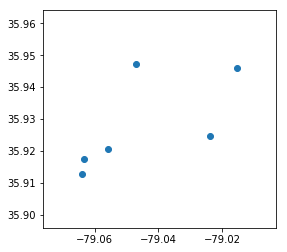

In [5]:
pickupLocations.plot()

In [23]:
def map_region(region):
  bounds = folium.GeoJson(region).get_bounds()
  center = [(bounds[0][0] + bounds[1][0]) / 2, (bounds[0][1] + bounds[1][1]) / 2]
  m = folium.Map(
    location=center,
    zoom_start=14,
    tiles='OpenStreetMap'  
  )


#   test = folium.Html('<b>Hello world</b>', script=True)
#   popup = 


  for index, row in region.iterrows():
    folium.Marker([row['lat'], row['lng']], popup="<strong>"+row['Locations']+"</strong>"+"\n"+row['Address']).add_to(m)
#     folium.Popup(max_width=600).add_to(m)

  return m
  
map_region(pickupLocations)